In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

<img src="dataset-cover.jpeg">

In [2]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\archive\twitter_training.csv")

In [3]:
# Rename all columns
df.columns = ['User_id', 'Platform','Sentiment','Comment']
df

,User_id,Platform,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_id    74681 non-null  int64 
 1   Platform   74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Comment    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df['Platform'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [6]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

<Axes: xlabel='Sentiment', ylabel='Count'>

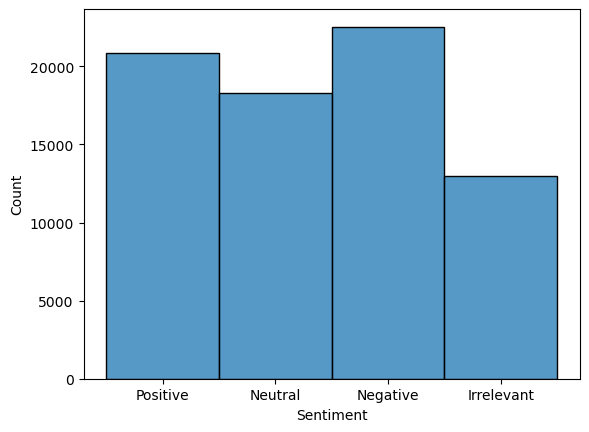

In [7]:
sns.histplot(df['Sentiment'])

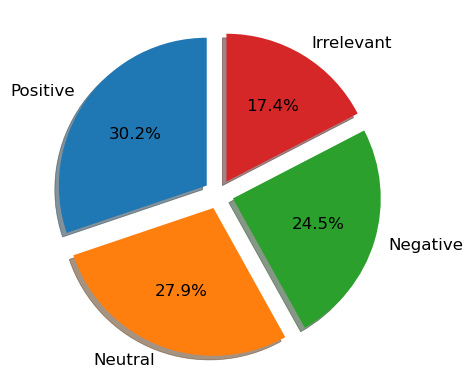

In [8]:
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1, 0.1, 0.1, 0.1], shadow=True)
plt.show()

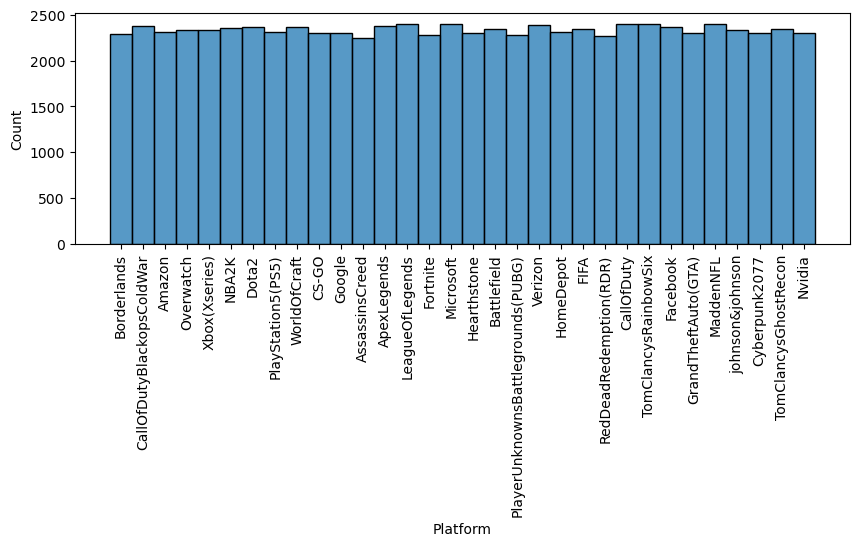

In [9]:
plt.figure(figsize=(10,3))
sns.histplot(df['Platform'])
plt.xticks(rotation = 90)
plt.show()

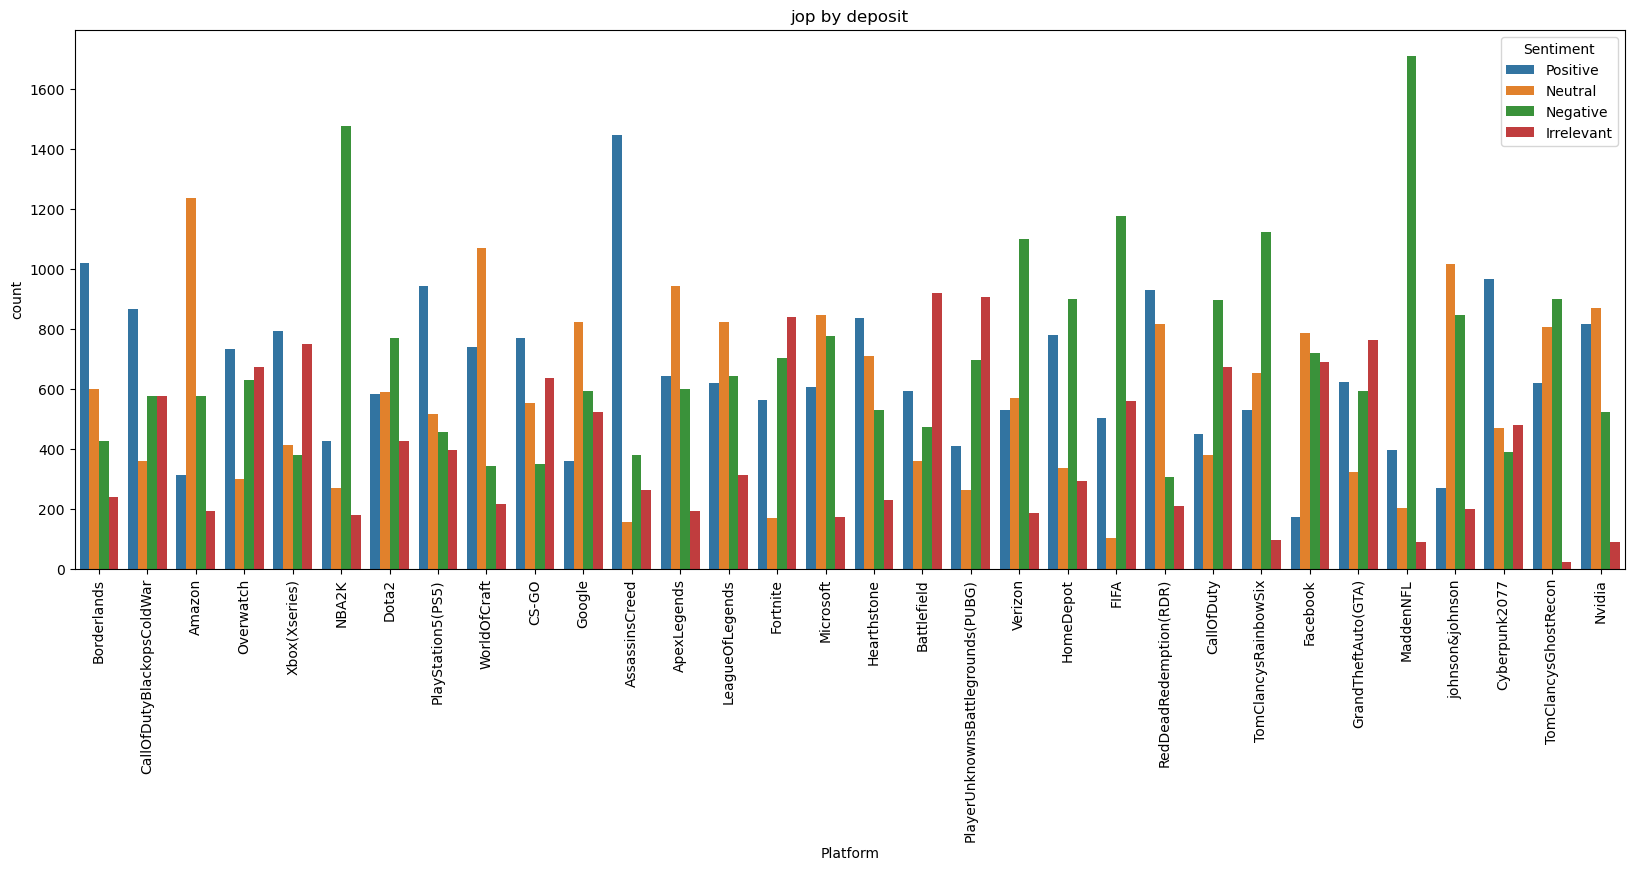

In [10]:
plt.figure(figsize=(20,7))
sns.countplot(x="Platform", hue="Sentiment", data=df)
plt.title("jop by deposit")
plt.xticks(rotation = 90)
plt.show()

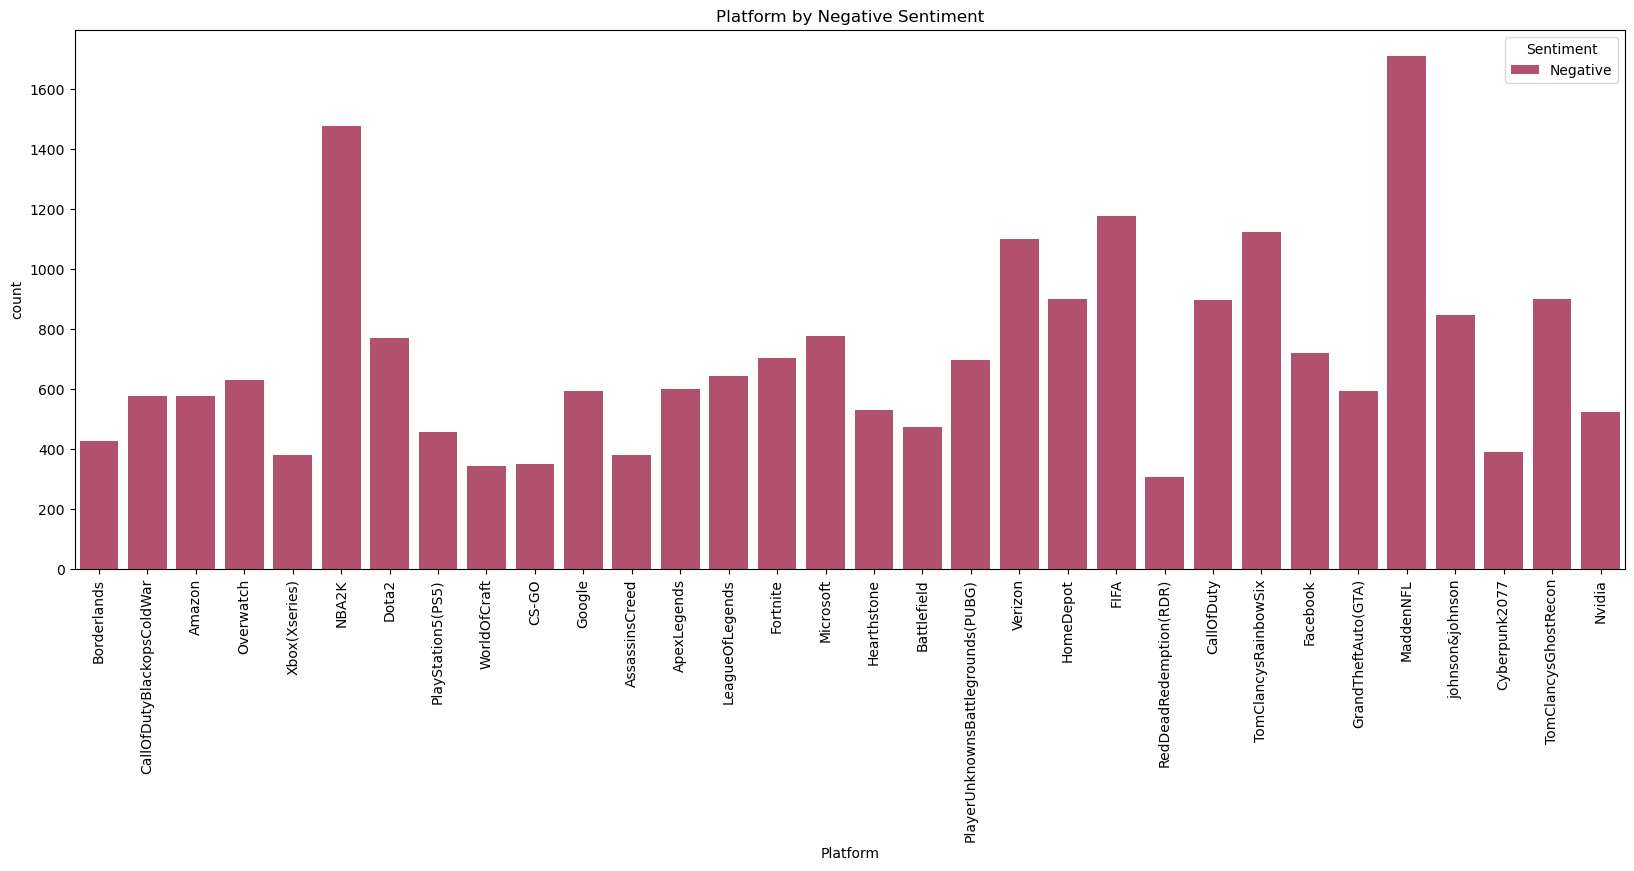

In [19]:
# Filter the DataFrame to include only 'Negative' sentiment
negative_df = df[df['Sentiment'] == 'Negative']

# Create the plot
plt.figure(figsize=(20, 7))
sns.countplot(x="Platform", hue="Sentiment", data=negative_df,palette='flare')
plt.title("Platform by Negative Sentiment")
plt.xticks(rotation=90)
plt.show()

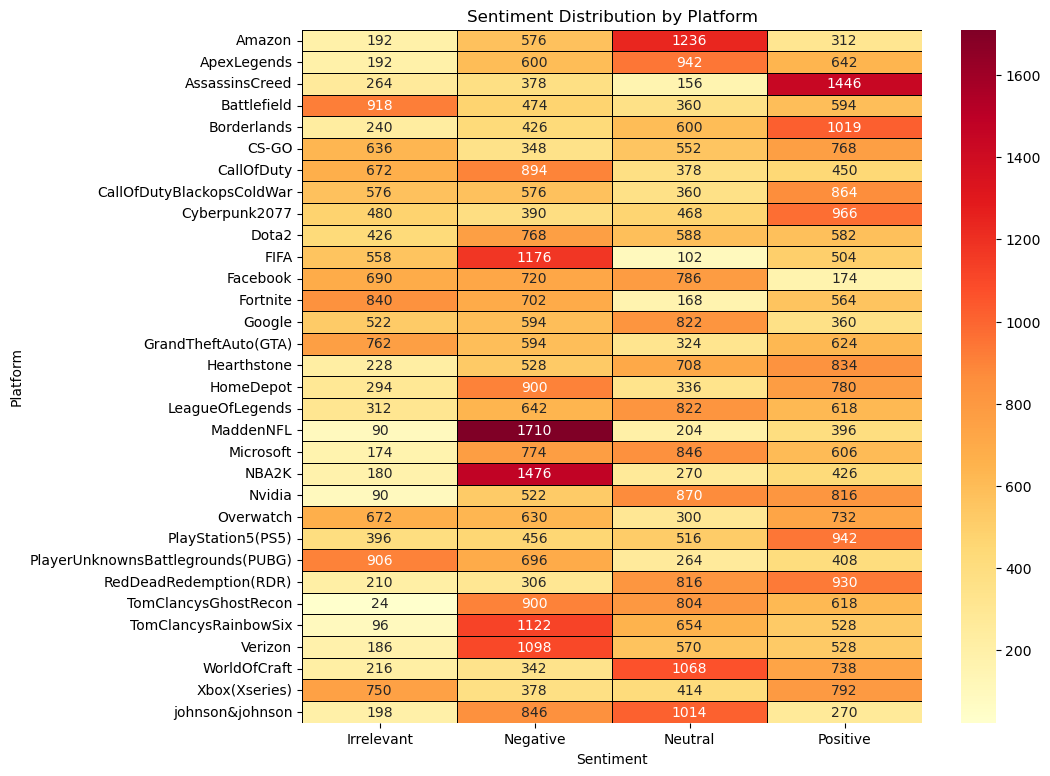

In [11]:
# Create cross-tabulation table in plot
plt.figure(figsize=(10, 9))
count_table = pd.crosstab(index=df['Platform'], columns=df['Sentiment'])
sns.heatmap(count_table, cmap='YlOrRd', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Platform')
plt.show()